1. Turn all data into numbers
2. Tensors have the right shape
3. Scale features (Normalize or standarize)

Note: NN prefer normalization

In [419]:
#Mount the google drive connection to our dataset
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [420]:
import pandas as pd
df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Tensorflow Notes/datasets/possum.csv')

In [421]:
df.head()

,case,site,Pop,sex,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
0,1,1,Vic,m,8.0,94.1,60.4,89.0,36.0,74.5,54.5,15.2,28.0,36.0
1,2,1,Vic,f,6.0,92.5,57.6,91.5,36.5,72.5,51.2,16.0,28.5,33.0
2,3,1,Vic,f,6.0,94.0,60.0,95.5,39.0,75.4,51.9,15.5,30.0,34.0
3,4,1,Vic,f,6.0,93.2,57.1,92.0,38.0,76.1,52.2,15.2,28.0,34.0
4,5,1,Vic,f,2.0,91.5,56.3,85.5,36.0,71.0,53.2,15.1,28.5,33.0


In [422]:
df.shape

(104, 14)

In [423]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104 entries, 0 to 103
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   case      104 non-null    int64  
 1   site      104 non-null    int64  
 2   Pop       104 non-null    object 
 3   sex       104 non-null    object 
 4   age       102 non-null    float64
 5   hdlngth   104 non-null    float64
 6   skullw    104 non-null    float64
 7   totlngth  104 non-null    float64
 8   taill     104 non-null    float64
 9   footlgth  103 non-null    float64
 10  earconch  104 non-null    float64
 11  eye       104 non-null    float64
 12  chest     104 non-null    float64
 13  belly     104 non-null    float64
dtypes: float64(10), int64(2), object(2)
memory usage: 11.5+ KB


In [424]:
df.isnull().sum()

case        0
site        0
Pop         0
sex         0
age         2
hdlngth     0
skullw      0
totlngth    0
taill       0
footlgth    1
earconch    0
eye         0
chest       0
belly       0
dtype: int64

In [425]:
df.isna().sum()

case        0
site        0
Pop         0
sex         0
age         2
hdlngth     0
skullw      0
totlngth    0
taill       0
footlgth    1
earconch    0
eye         0
chest       0
belly       0
dtype: int64

In [426]:
df.dropna(inplace=True)

In [427]:
df.isna().sum()

case        0
site        0
Pop         0
sex         0
age         0
hdlngth     0
skullw      0
totlngth    0
taill       0
footlgth    0
earconch    0
eye         0
chest       0
belly       0
dtype: int64

In [428]:
df.isnull().sum()

case        0
site        0
Pop         0
sex         0
age         0
hdlngth     0
skullw      0
totlngth    0
taill       0
footlgth    0
earconch    0
eye         0
chest       0
belly       0
dtype: int64

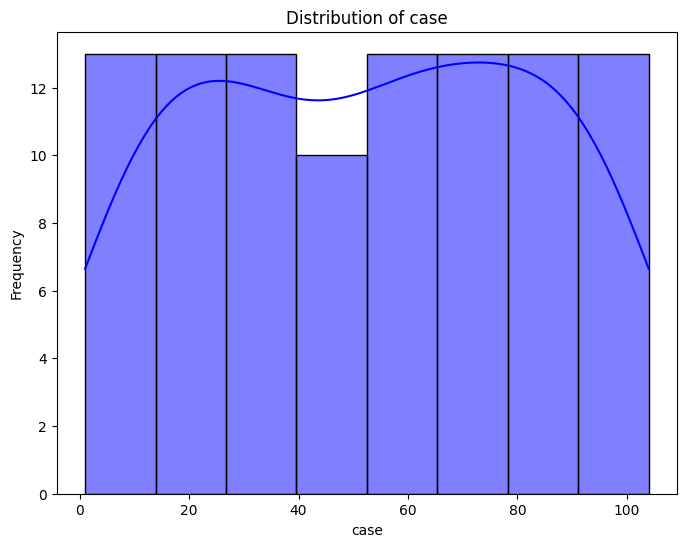

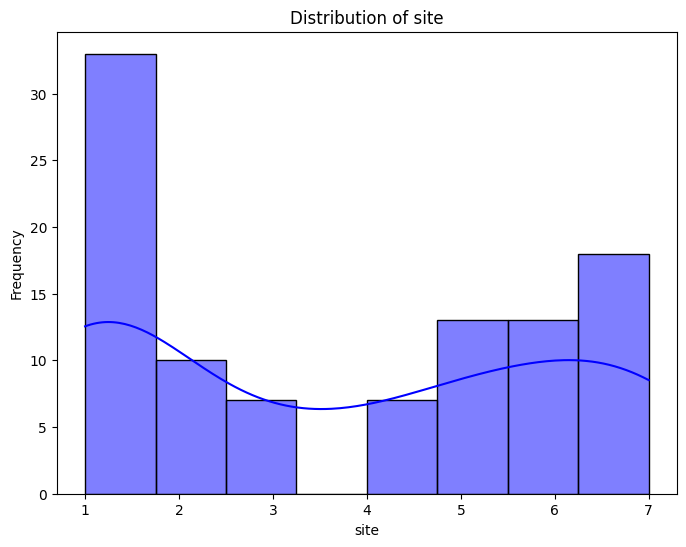

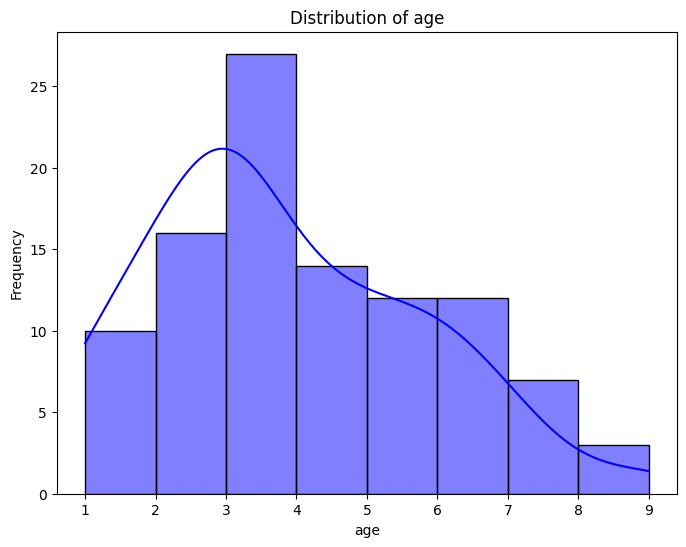

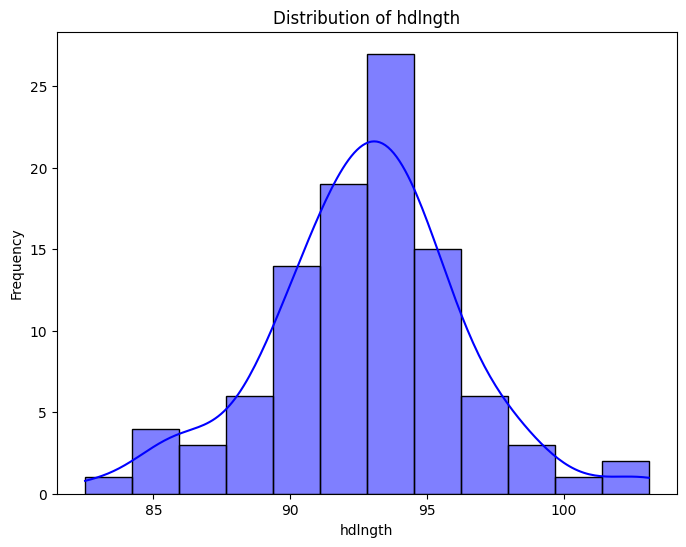

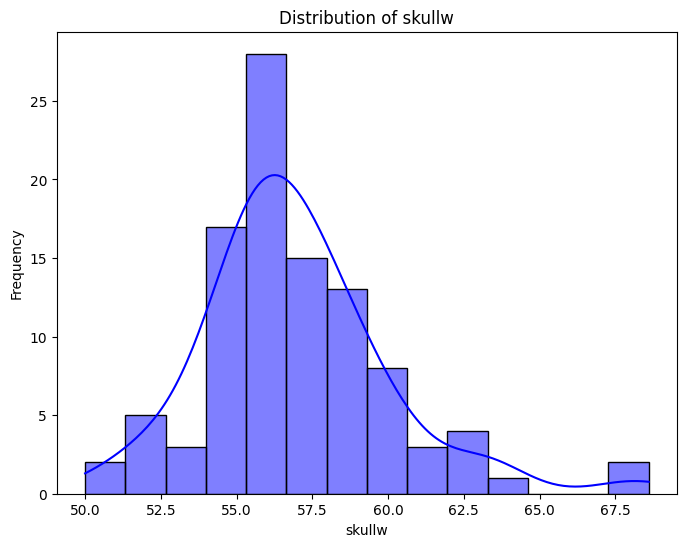

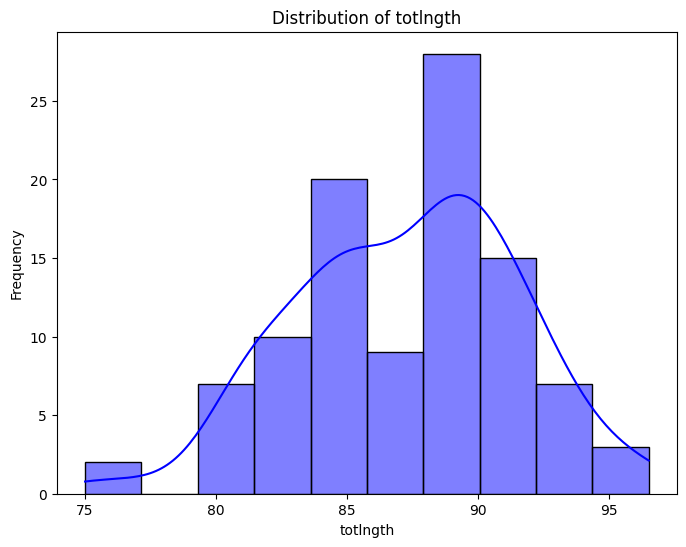

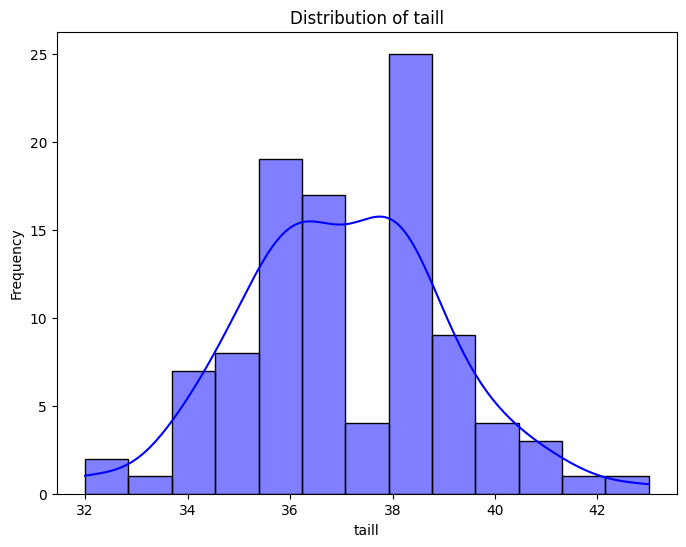

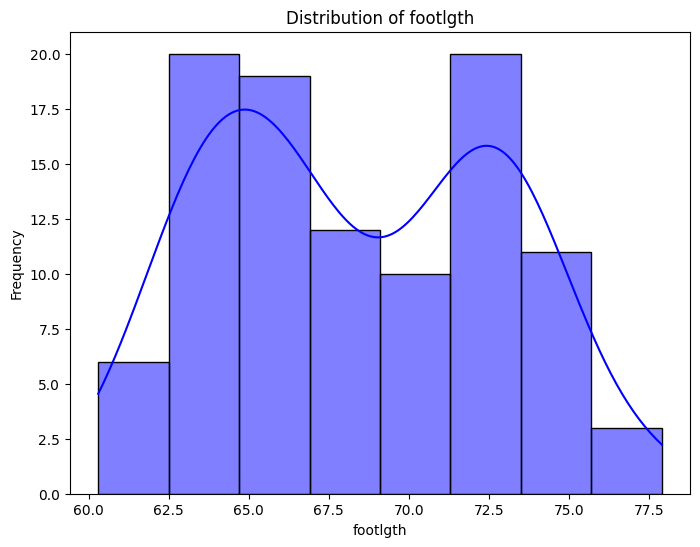

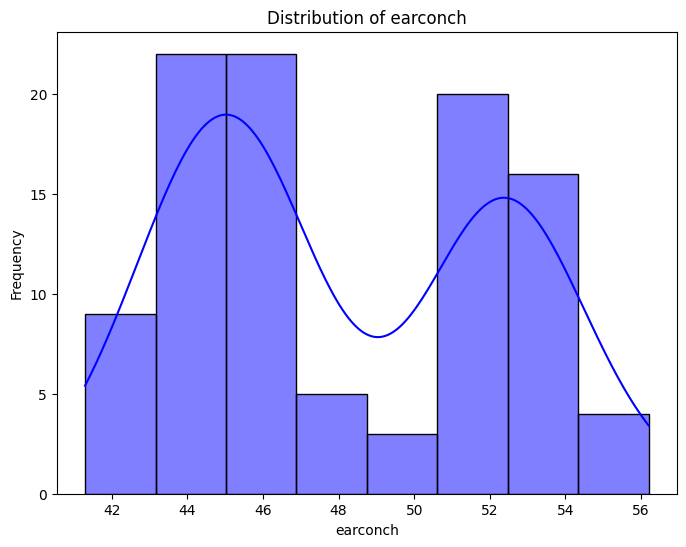

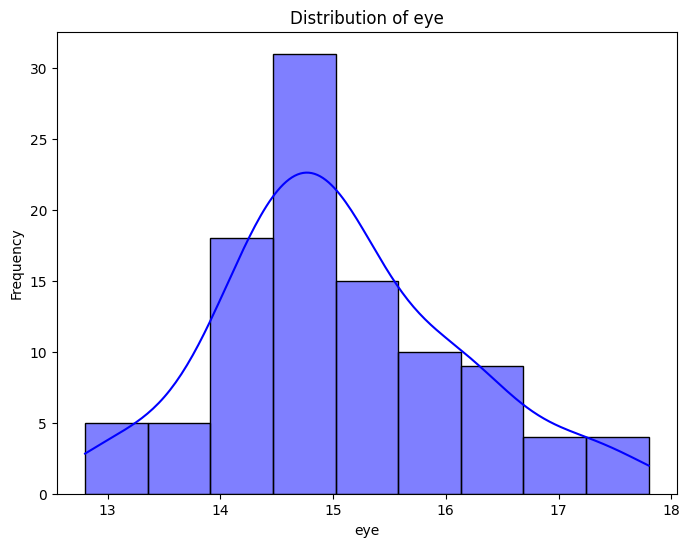

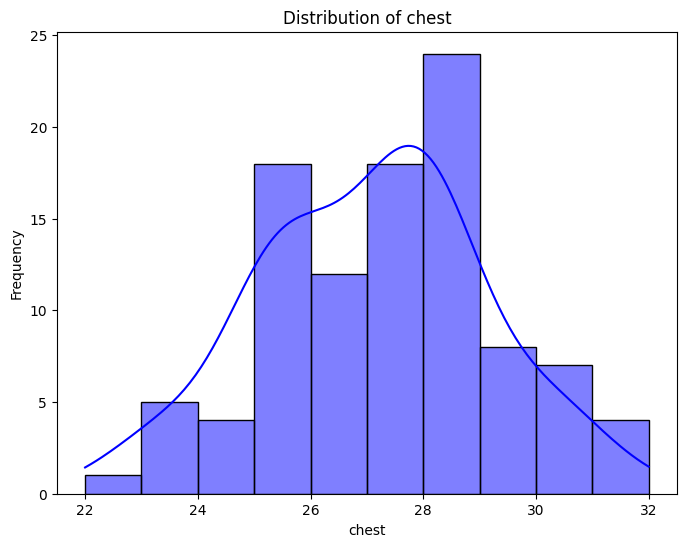

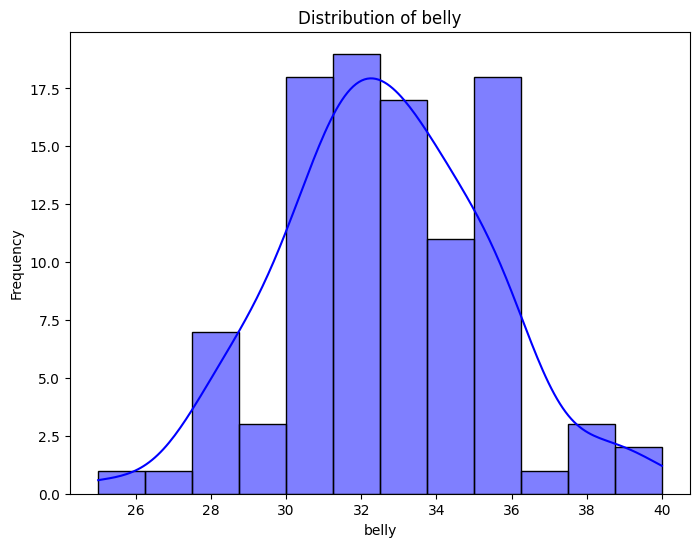

<ipython-input-429-eae17d6a7f85>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df[feature], order=df[feature].value_counts().index, palette='Set2')


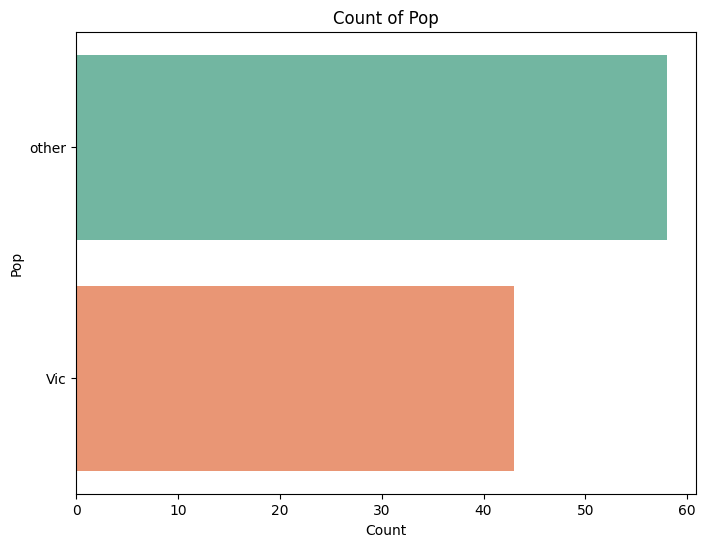

<ipython-input-429-eae17d6a7f85>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df[feature], order=df[feature].value_counts().index, palette='Set2')


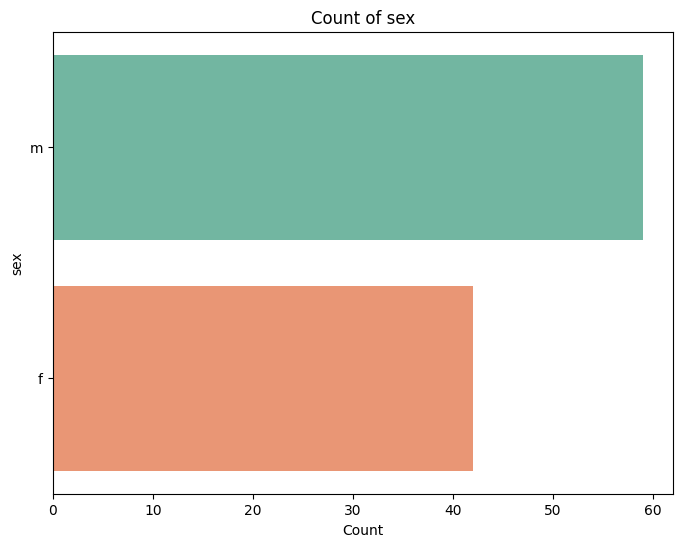

In [429]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_charts(df):
  # Numeric features
  numeric_features = [col for col in df.columns if df[col].dtype in ['int64', 'float64']]
  for feature in numeric_features:
      plt.figure(figsize=(8, 6))
      sns.histplot(df[feature], kde=True, color='blue')
      plt.title(f'Distribution of {feature}')
      plt.xlabel(feature)
      plt.ylabel('Frequency')
      plt.show()

  # Categorical features
  categorical_features = [col for col in df.columns if df[col].dtype == 'object']
  for feature in categorical_features:
      plt.figure(figsize=(8, 6))
      sns.countplot(y=df[feature], order=df[feature].value_counts().index, palette='Set2')
      plt.title(f'Count of {feature}')
      plt.xlabel('Count')
      plt.ylabel(feature)
      plt.show()

plot_charts(df)

In [430]:
df.drop("case", axis=1, inplace=True)

#Feature Scaling

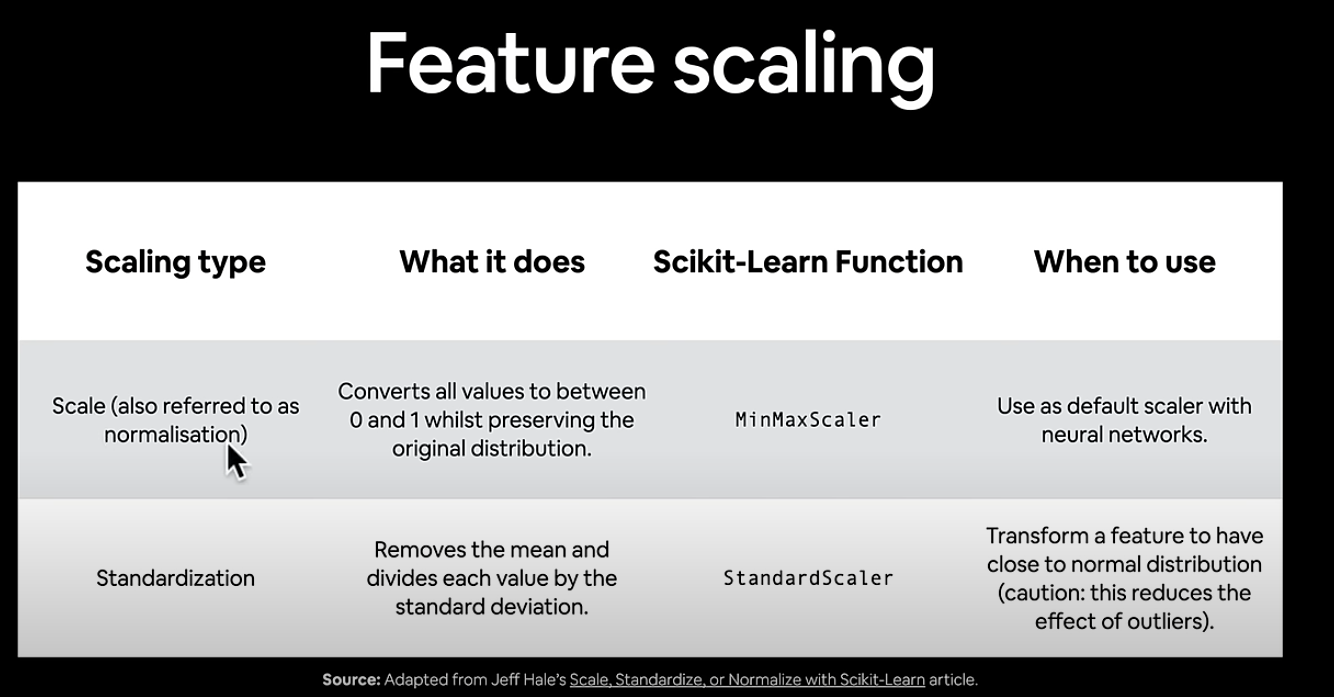

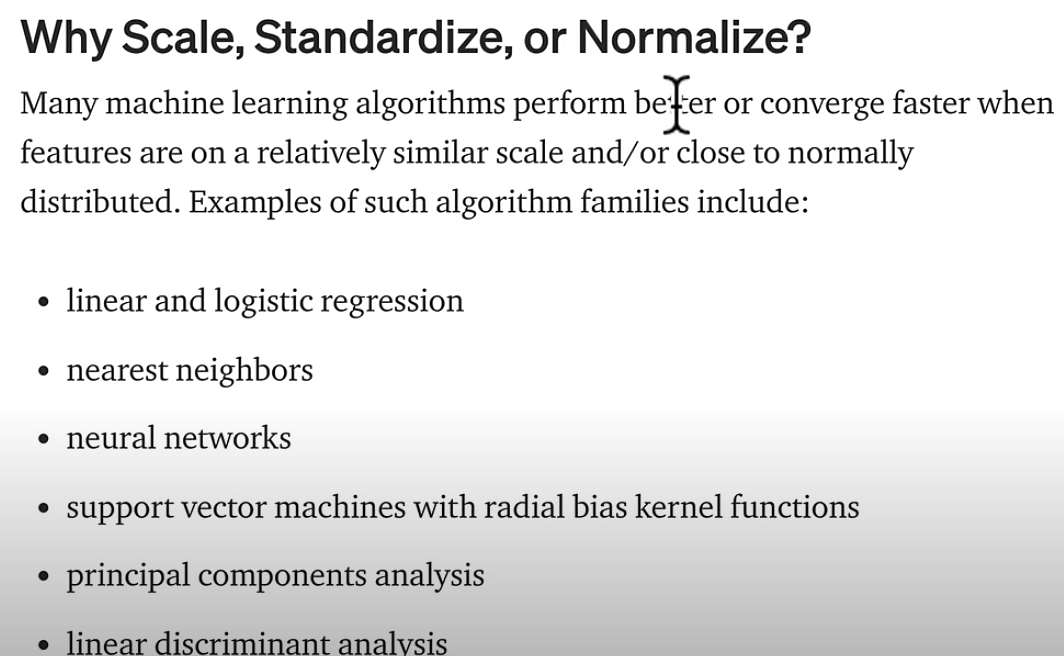

#With Normalization

In [431]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, StandardScaler
import numpy as np

In [432]:
filtered_columns = [col for col in df.columns if not col.startswith(('Pop', 'sex'))]

In [433]:
filtered_columns.remove("skullw")

In [434]:
ct = make_column_transformer(
    (MinMaxScaler(feature_range=(0, 1)), filtered_columns),
    (OneHotEncoder(handle_unknown="ignore"), ['Pop', 'sex'])
)

In [435]:
X = df.drop("skullw", axis=1)
y = df["skullw"]

In [436]:
from sklearn.model_selection import train_test_split
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [437]:
ct.fit(X_train)

ColumnTransformer(transformers=[('minmaxscaler', MinMaxScaler(),
                                 ['site', 'age', 'hdlngth', 'totlngth', 'taill',
                                  'footlgth', 'earconch', 'eye', 'chest',
                                  'belly']),
                                ('onehotencoder',
                                 OneHotEncoder(handle_unknown='ignore'),
                                 ['Pop', 'sex'])])

In [438]:
X_train_normal = ct.transform(X_train)
X_val_normal = ct.transform(X_val)
X_test_normal = ct.transform(X_test)

In [439]:
X_train_normal

array([[0.16666667, 0.375     , 0.5776699 , 0.46511628, 0.31818182,
        0.61931818, 0.95302013, 0.75555556, 0.66666667, 0.7       ,
        1.        , 0.        , 0.        , 1.        ],
       [0.        , 0.625     , 0.59708738, 0.74418605, 0.45454545,
        0.70454545, 0.84563758, 0.33333333, 0.77777778, 0.6       ,
        1.        , 0.        , 1.        , 0.        ],
       [0.33333333, 0.125     , 0.36893204, 0.65116279, 0.5       ,
        0.32386364, 0.28187919, 0.44444444, 0.33333333, 0.53333333,
        0.        , 1.        , 0.        , 1.        ],
       [0.83333333, 0.625     , 0.53883495, 0.41860465, 0.36363636,
        0.14204545, 0.10738255, 0.71111111, 0.33333333, 0.66666667,
        0.        , 1.        , 0.        , 1.        ],
       [0.        , 0.375     , 0.54854369, 0.55813953, 0.22727273,
        0.73295455, 0.7852349 , 0.51111111, 0.55555556, 0.33333333,
        1.        , 0.        , 0.        , 1.        ],
       [0.        , 0.375     , 0.5

In [440]:
X_train.iloc[0]

site           2
Pop          Vic
sex            m
age          4.0
hdlngth     94.4
totlngth    85.0
taill       35.5
footlgth    71.2
earconch    55.5
eye         16.4
chest       28.0
belly       35.5
Name: 34, dtype: object

In [441]:
X_train_normal[0]

array([0.16666667, 0.375     , 0.5776699 , 0.46511628, 0.31818182,
       0.61931818, 0.95302013, 0.75555556, 0.66666667, 0.7       ,
       1.        , 0.        , 0.        , 1.        ])

In [442]:
X_train.shape, X_train_normal.shape

((60, 12), (60, 14))

Loss: nan happens due to non-processed data (Or if data has null or na values). Also, happens due lack of normalization of standarization

In [443]:
import tensorflow as tf

# Create the model with Sequential API using .add method
model = tf.keras.Sequential(name="Model_1")
model.add(tf.keras.Input(shape=(14,)))  # The input layer
model.add(tf.keras.layers.Dense(200, activation='relu'))  # The hidden layer
model.add(tf.keras.layers.Dense(1, activation=None))  # The output layer

# Compile the model
model.compile(loss="mae",
              optimizer=tf.keras.optimizers.SGD(learning_rate=0.001),
              metrics=["mae"])

# Assuming X_tensor and y_tensor are your input and target tensors
# Fit the model
model.fit(X_train_normal, y_train, epochs=200)

Epoch 1/200
2/2 [==============================] - 1s 8ms/step - loss: 56.7541 - mae: 56.7541
Epoch 2/200
2/2 [==============================] - 0s 7ms/step - loss: 56.7390 - mae: 56.7390
Epoch 3/200
2/2 [==============================] - 0s 7ms/step - loss: 56.7238 - mae: 56.7238
Epoch 4/200
2/2 [==============================] - 0s 7ms/step - loss: 56.7086 - mae: 56.7086
Epoch 5/200
2/2 [==============================] - 0s 10ms/step - loss: 56.6933 - mae: 56.6933
Epoch 6/200
2/2 [==============================] - 0s 8ms/step - loss: 56.6781 - mae: 56.6781
Epoch 7/200
2/2 [==============================] - 0s 7ms/step - loss: 56.6628 - mae: 56.6628
Epoch 8/200
2/2 [==============================] - 0s 7ms/step - loss: 56.6475 - mae: 56.6475
Epoch 9/200
2/2 [==============================] - 0s 7ms/step - loss: 56.6320 - mae: 56.6320
Epoch 10/200
2/2 [==============================] - 0s 6ms/step - loss: 56.6166 - mae: 56.6166
Epoch 11/200
2/2 [==============================] - 0s 6ms

In [444]:
model.summary()

Model: "Model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_22 (Dense)            (None, 200)               3000      
                                                                 
 dense_23 (Dense)            (None, 1)                 201       
                                                                 
Total params: 3201 (12.50 KB)
Trainable params: 3201 (12.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [445]:
model.evaluate(X_val_normal, y_val)

1/1 [==============================] - 0s 174ms/step - loss: 51.9884 - mae: 51.9884


[51.988380432128906, 51.988380432128906]

In [446]:
model.evaluate(X_test_normal, y_test)

1/1 [==============================] - 0s 44ms/step - loss: 51.6442 - mae: 51.6442


[51.64420700073242, 51.64420700073242]

#With standardization

In [447]:
ct2 = make_column_transformer(
    (StandardScaler(), filtered_columns),
    (OneHotEncoder(handle_unknown="ignore"), ['Pop', 'sex'])
)

In [448]:
ct2.fit(X_train)

ColumnTransformer(transformers=[('standardscaler', StandardScaler(),
                                 ['site', 'age', 'hdlngth', 'totlngth', 'taill',
                                  'footlgth', 'earconch', 'eye', 'chest',
                                  'belly']),
                                ('onehotencoder',
                                 OneHotEncoder(handle_unknown='ignore'),
                                 ['Pop', 'sex'])])

In [449]:
X_train_standardized = ct2.transform(X_train)
X_val_standardized = ct2.transform(X_val)
X_test_standardized = ct2.transform(X_test)

In [450]:
X_train.iloc[0]

site           2
Pop          Vic
sex            m
age          4.0
hdlngth     94.4
totlngth    85.0
taill       35.5
footlgth    71.2
earconch    55.5
eye         16.4
chest       28.0
belly       35.5
Name: 34, dtype: object

In [451]:
X_train_standardized[0]

array([-0.78543388,  0.0701215 ,  0.38950114, -0.51064731, -0.8076897 ,
        0.7121997 ,  1.89140487,  1.27559041,  0.45103481,  1.05104156,
        1.        ,  0.        ,  0.        ,  1.        ])

In [452]:
X_train.shape, X_train_standardized.shape

((60, 12), (60, 14))

In [453]:
import tensorflow as tf

# Create the model with Sequential API using .add method
model2 = tf.keras.Sequential(name="Model_2")
model2.add(tf.keras.Input(shape=(14,)))  # The input layer
model2.add(tf.keras.layers.Dense(200, activation='relu'))  # The hidden layer
model2.add(tf.keras.layers.Dense(1, activation=None))  # The output layer

# Compile the model
model2.compile(loss="mae",
              optimizer=tf.keras.optimizers.SGD(learning_rate=0.001),
              metrics=["mae"])

# Assuming X_tensor and y_tensor are your input and target tensors
# Fit the model
model2.fit(X_train_standardized, y_train, epochs=200)

Epoch 1/200
2/2 [==============================] - 1s 8ms/step - loss: 56.7108 - mae: 56.7108
Epoch 2/200
2/2 [==============================] - 0s 7ms/step - loss: 56.6966 - mae: 56.6966
Epoch 3/200
2/2 [==============================] - 0s 8ms/step - loss: 56.6824 - mae: 56.6824
Epoch 4/200
2/2 [==============================] - 0s 7ms/step - loss: 56.6682 - mae: 56.6682
Epoch 5/200
2/2 [==============================] - 0s 7ms/step - loss: 56.6542 - mae: 56.6542
Epoch 6/200
2/2 [==============================] - 0s 9ms/step - loss: 56.6401 - mae: 56.6401
Epoch 7/200
2/2 [==============================] - 0s 8ms/step - loss: 56.6259 - mae: 56.6259
Epoch 8/200
2/2 [==============================] - 0s 6ms/step - loss: 56.6116 - mae: 56.6116
Epoch 9/200
2/2 [==============================] - 0s 8ms/step - loss: 56.5974 - mae: 56.5974
Epoch 10/200
2/2 [==============================] - 0s 7ms/step - loss: 56.5832 - mae: 56.5832
Epoch 11/200
2/2 [==============================] - 0s 6ms/

In [454]:
model2.summary()

Model: "Model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_24 (Dense)            (None, 200)               3000      
                                                                 
 dense_25 (Dense)            (None, 1)                 201       
                                                                 
Total params: 3201 (12.50 KB)
Trainable params: 3201 (12.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [455]:
model2.evaluate(X_val_standardized, y_val)

1/1 [==============================] - 0s 138ms/step - loss: 53.5514 - mae: 53.5514


[53.551368713378906, 53.551368713378906]

In [457]:
model2.evaluate(X_test_standardized, y_test)

1/1 [==============================] - 0s 38ms/step - loss: 53.1374 - mae: 53.1374


[53.13740539550781, 53.13740539550781]